# Lab5
## OpenCV - Fourier, Wavelet discrete transformations
### Installations
* Download from https://pypi.python.org/pypi/opencv-python and follow instruction there
* pip install opencv*.whl
* pip install PyWavelets
### Tasks
* In the LPF, make filtering region circle not square
* Make High Pass Filter(HPF) as example take into consideration LPF
* Make Band Pass Filter
* Correct wavelet code

## Fourier transformation

Shape of original image: (512, 512)


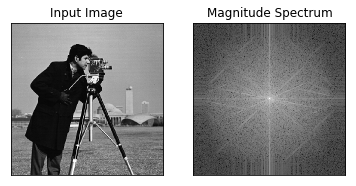

In [7]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from skimage import data
# img = cv2.imread('xfiles.jpg',0)
img = data.camera()

img_float32 = np.float32(img)
print('Shape of original image:',img_float32.shape)
dft = cv2.dft(img_float32, flags = cv2.DFT_COMPLEX_OUTPUT)
# Now once you got the result, zero frequency component 
# (DC component) will be at top left corner. 
# If you want to bring it to center, you need
# to shift the result by \frac{N}{2} in both the directions. 
# This is simply done by the function, np.fft.fftshift().
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()         

### numpy.fft.fftshift

In [13]:
import numpy as np
# Return the Discrete Fourier Transform sample frequencies.
freqs = np.fft.fftfreq(10, 0.1)
print(freqs)
freqs_shifted = np.fft.fftshift(freqs)
print(freqs_shifted)
print(cv2.magnitude(freqs_shifted,freqs_shifted))

[ 0.  1.  2.  3.  4. -5. -4. -3. -2. -1.]
[-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.]
[[ 7.07106781]
 [ 5.65685425]
 [ 4.24264069]
 [ 2.82842712]
 [ 1.41421356]
 [ 0.        ]
 [ 1.41421356]
 [ 2.82842712]
 [ 4.24264069]
 [ 5.65685425]]


In [4]:
rows, cols = img.shape
crow, ccol = int(rows/2) , int(cols/2)     # center
flt_size = 10
# create a mask first, center square is 1, remaining all zeros
mask_ = np.zeros((rows, cols, 2), np.uint8)
mask_[crow-flt_size:crow+flt_size, ccol-flt_size:ccol+flt_size,:] = 1

In [10]:
new_shift = dft_shift*mask_
new_ishift = np.fft.ifftshift(new_shift)
img_back = cv2.idft(new_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

In [9]:
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(img_back, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

NameError: name 'img_back' is not defined

In [3]:
import numpy as np
from matplotlib import pyplot as plt
from skimage import data
from sklearn.preprocessing import MinMaxScaler 
import pywt

img = data.camera()
plt.imshow(imArray_H,cmap='gray')
imArray = np.float32(img)
imArray /= 255;

coeffs=pywt.wavedec2(imArray, 'haar')
coeffs_H=list(coeffs)  
coeffs_H[0] *= 0;  


#     # reconstruction
imArray_H=pywt.waverec2(coeffs_H, 'haar')
plt.imshow(imArray_H)
plt.show()

NameError: name 'imArray_H' is not defined